In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, model_from_json
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, ActivityRegularization, Lambda, Concatenate, Permute, Convolution1D, MaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import concatenate, dot
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, Lambda, concatenate, Add
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D, LeakyReLU

from tensorflow.keras.models import Sequential, Model



from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

from matplotlib.legend_handler import HandlerLine2D
from matplotlib.colors import LogNorm
import pylab as pyy
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from functools import partial
import matplotlib.pyplot as plt
from matplotlib import colors as mcol

# import pylab as py
# from tools import load, save, checkdir
import pandas as pd
from matplotlib.lines import Line2D

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-xskr8wjk because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [11]:
data = np.load("inverse_mappers/GAN/eICU_age.npy")
data.shape

(2520,)

In [12]:
data= data['age']
data= np.array(data).reshape(-1,1)
data.shape

(2520, 1)

In [13]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler,StandardScaler, QuantileTransformer, PowerTransformer
data_sc= QuantileTransformer(output_distribution='normal')# minmax
data_scaled = data_sc.fit_transform(data) 

In [32]:
clas = data_scaled
class WGAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        # Following parameter and optimizer set as recommended in paper
        self.n_critic = 5
        self.clip_value = 0.01
        optimizer = RMSprop(lr=0.00005)

        # Build and compile the critic
        self.critic = self.build_critic()
        self.critic.compile(loss=self.wasserstein_loss,
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generated imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.critic.trainable = False

        # The critic takes generated images as input and determines validity
        valid = self.critic(img)

        # The combined model  (stacked generator and critic)
        self.combined = Model(z, valid)
        self.combined.compile(loss=self.wasserstein_loss,
            optimizer=optimizer,
            metrics=['accuracy'])

    def wasserstein_loss(self, y_true, y_pred):
        return K.mean(y_true * y_pred)

    def build_generator(self):

        noise = Input(shape=(100,))
        
        rate = 0.000000000001
        x11 = Dense(512)(noise)
        x1 = BatchNormalization(momentum=0.8)(x11)
        x1 = LeakyReLU(alpha=0.2)(x1)
        

        x2 = Dense(512)(x1)
        x2 = BatchNormalization(momentum=0.8)(x2)
        x2 = LeakyReLU(alpha=0.2)(x2)
        

        x3 = Dense(512)(x2)
         
        sc11 = Add()([x11, x3])
        sc1 = BatchNormalization(momentum=0.8)(sc11)
        sc1 = LeakyReLU(alpha=0.2)(sc1)
        

        x4 = Dense(512)(sc1)
        x4 = BatchNormalization(momentum=0.8)(x4)
        x4 = LeakyReLU(alpha=0.2) (x4)
        
        
        x5 = Dense(512)(x4)
        
        sc22 = Add()([sc11, x5])
        sc2 = BatchNormalization(momentum=0.8)(sc22)
        sc2 = LeakyReLU(alpha=0.2)(sc2)
        
        x6 = Dense(512)(sc2)
        x6 = BatchNormalization(momentum=0.8)(x6)
        x6 = LeakyReLU(alpha=0.2) (x6)
        
        x7 = Dense(512)(x6)
        
        sc33 = Add()([sc22, x7])
        sc3 = BatchNormalization(momentum=0.8)(sc33)
        sc3 = LeakyReLU(alpha=0.2)(sc3)
        
        
        x8 = Dense(512)(sc3)
        x8 = BatchNormalization(momentum=0.8)(x8)
        x8 = LeakyReLU(alpha=0.2) (x8)
        
        x9 = Dense(512)(x8)
        
        sc44 = Add()([sc33, x9])
        sc4 = BatchNormalization(momentum=0.8)(sc44)
        sc4 = LeakyReLU(alpha=0.2)(sc4)
        
        

        output = Dense(1)(sc4)
        #features = Lambda(self.feature_mul)(output2)
        #outputmerge = concatenate([output2, features])
        generator = Model(inputs=noise, outputs=[output])
        generator.summary()
        return(generator)


    def build_critic(self):
        
        rate = 0.00002
        
        vis = Input(shape=(clas.shape[1],))
        
        x11 = Dense(512)(vis)
        #x1 = BatchNormalization(momentum=0.8)(x11)
        x1 = LeakyReLU(alpha=0.2)(x11)
        x1 = Dropout(rate)(x1)
        

        x2 = Dense(512)(x1)
        #x2 = BatchNormalization(momentum=0.8)(x2)
        x2 = LeakyReLU(alpha=0.2)(x2)
        x2 = Dropout(rate)(x2)
        

        x3 = Dense(512)(x2)
         
        sc11 = Add()([x11, x3])
        #sc1 = BatchNormalization(momentum=0.8)(sc11)
        sc1 = LeakyReLU(alpha=0.2)(sc11)
        sc1 = Dropout(rate)(sc1)
        

        x4 = Dense(512)(sc1)
        #x4 = BatchNormalization(momentum=0.8)(x4)
        x4 = LeakyReLU(alpha=0.2) (x4)
        x4 = Dropout(rate)(x4)
        
        
        x5 = Dense(512)(x4)
        
        sc22 = Add()([sc11, x5])
        #sc2 = BatchNormalization(momentum=0.8)(sc22)
        sc2 = LeakyReLU(alpha=0.2)(sc22)
        sc2 = Dropout(rate)(sc2)
        
        
        x6 = Dense(512)(sc2)
        #x6 = BatchNormalization(momentum=0.8)(x6)
        x6 = LeakyReLU(alpha=0.2) (x6)
        x6 = Dropout(rate)(x6)
        
        
        x7 = Dense(512)(x6)
        
        sc33 = Add()([sc22, x7])
        #sc3 = BatchNormalization(momentum=0.8)(sc33)
        sc3 = LeakyReLU(alpha=0.2)(sc33)
        sc3 = Dropout(rate)(sc3)
        
        
        x8 = Dense(512)(sc3)
        #x8 = BatchNormalization(momentum=0.8)(x8)
        x8 = LeakyReLU(alpha=0.2) (x8)
        x8 = Dropout(rate)(x8)
        
        x9 = Dense(512)(x8)
        
        sc44 = Add()([sc33, x9])
        #sc4 = BatchNormalization(momentum=0.8)(sc44)
        sc4 = LeakyReLU(alpha=0.2)(sc44)
        sc4 = Dropout(rate)(sc4)
        
        # (!!!) No softmax
        output = Dense(1)(sc4)

        discriminator = Model(inputs=vis, outputs=output)
        discriminator.summary()
        return(discriminator)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        
        X_train= data_scaled
    # Adversarial ground truths
        valid = -np.ones((batch_size, 1))
        fake = np.ones((batch_size, 1))

        for epoch in range(epochs):

            for _ in range(self.n_critic):

                # ---------------------
                #  Train Discriminator
                # ---------------------

                # Select a random batch of images
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                imgs = X_train[idx]
                
                # Sample noise as generator input
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

                # Generate a batch of new images
                gen_imgs = self.generator.predict(noise, verbose = 0)

                # Train the critic
                d_loss_real = self.critic.train_on_batch(imgs, valid)
                d_loss_fake = self.critic.train_on_batch(gen_imgs, fake )
                d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)

                # Clip critic weights
                for l in self.critic.layers:
                    weights = l.get_weights()
                    weights = [np.clip(w, -self.clip_value, self.clip_value) for w in weights]
                    l.set_weights(weights)


            # ---------------------
            #  Train Generator
            # ---------------------

            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            #print ("%d [D loss: %f] [G loss: %f]" % (epoch, 1 - d_loss[0], 1 - g_loss[0]))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)
                
    def sample_images(self, epoch):

        SAMPLE_SIZE = clas.shape[0] 
        noise = np.random.normal(0, 1, (SAMPLE_SIZE, 100))
        

        results = self.generator.predict(noise, batch_size = 20000, verbose=0)
        
        plt.figure(figsize=(10,7))

        plt.hist(np.round(data_sc.inverse_transform(results)), bins = 100, histtype = 'step',color='darkgreen',label="GAN")
        plt.hist(data, bins = 100,color='darkseagreen', label= "True")
        # plt.xlim(data.min(),data.max())
        plt.legend(loc = 'upper center', fontsize = 25, frameon = 0)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        #plt.savefig("Gan.png")
        plt.show()




In [33]:
gan = WGAN()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_40 (Dense)               (None, 512)          1024        ['input_7[0][0]']                
                                                                                                  
 leaky_re_lu_36 (LeakyReLU)     (None, 512)          0           ['dense_40[0][0]']               
                                                                                                  
 dropout_18 (Dropout)           (None, 512)          0           ['leaky_re_lu_36[0][0]']         
                                                                                            

/home/almaeen/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 dense_50 (Dense)               (None, 512)          51712       ['input_8[0][0]']                
                                                                                                  
 batch_normalization_18 (BatchN  (None, 512)         2048        ['dense_50[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 leaky_re_lu_45 (LeakyReLU)     (None, 512)          0           ['batch_normalization_18[0]

In [1]:
#gan.train(epochs=5000000, batch_size=32, sample_interval=200)

In [38]:

SAMPLE_SIZE = clas.shape[0] 
noise = np.random.normal(0, 1, (SAMPLE_SIZE, 100))


results = gan.generator.predict(noise, batch_size = 20000)






1/1 [==============================] - 0s 45ms/step


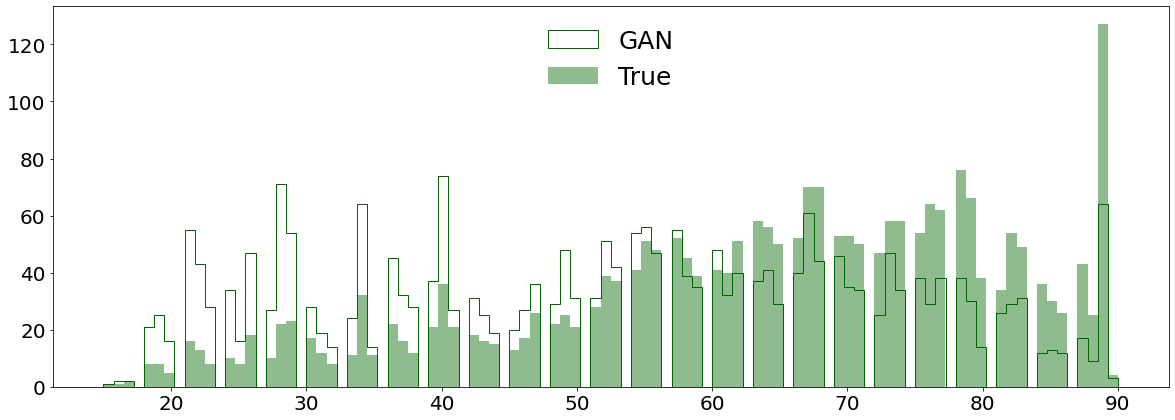

In [41]:
plt.figure(figsize=(20,7))

plt.hist(np.round(data_sc.inverse_transform(results)), bins = 100, histtype = 'step',color='darkgreen',label="GAN")
plt.hist(data, bins = 100,color='darkseagreen', label= "True")
# plt.xlim(data.min(),data.max())
plt.legend(loc = 'upper center', fontsize = 25, frameon = 0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("Gan.png")
plt.show()

